## LeNet5 Implementation
**Martin Jasinski**

BMEG 5XX

In [16]:
#imports

import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Prepare the dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [18]:
# build the CNN:

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # 2 convolutions
        # 3 channels for colored images
        #                                   in: 3 x 32 x 32
        self.conv1 = nn.Conv2d(3, 6, 5)    #    6 x 28 x 28
        self.pool = nn.AvgPool2d(2,2)      #    6 x 14 x 14
        self.conv2 = nn.Conv2d(6, 16, 5)   #    16 x 10 x 10
        self.pool = nn.AvgPool2d(2,2)      #    16 x 5 x 5
        # full connected layer
        # flatten here                        # 1 x 400
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 1 x 120
        self.fc2 = nn.Linear(120, 84)         # 1 x 84
        self.fc3 = nn.Linear(84, 10)          # 1 x 10

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(np.shape(x))
        x = x.view(1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
LeNet5 = LeNet5()

In [19]:
# define the loss function and optimizer:
lossfn = nn.CrossEntropyLoss()
optim  = optim.SGD(LeNet5.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# variables to monitor the training
mj_time = []
mj_loss = []

# Train the network on the datasets
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # set a clear gradient
        optim.zero_grad()
        # get the outputs from the network
        outputs = LeNet5(inputs)
        # computer the loss 
        loss = lossfn(outputs, labels)
        # update the parameters
        loss.backward()
        optim.step()

        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            mj_time.append(i + 1)
            mj_loss.append(running_loss / 100)
            running_loss = 0.0

print('Finished Training')

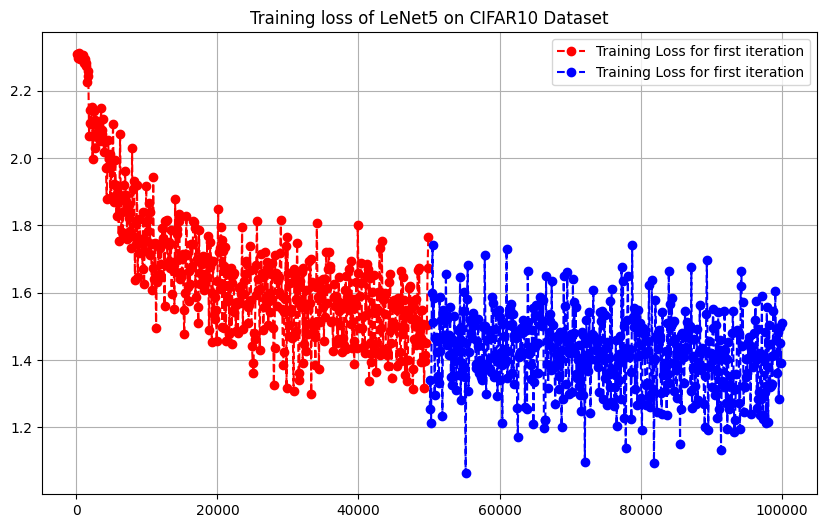

In [ ]:
mj_time2 = [x + mj_time[499] for x  in mj_time[500:]]
#training results
plt.figure(figsize=(10,6))
plt.plot(mj_time[0:499], mj_loss[0:499], 'ro--', label="Training Loss for first iteration")
plt.plot(mj_time2, mj_loss[500:], 'bo--', label="Training Loss for first iteration")

plt.xlabel="Time [Epochs]"
plt.ylabel="Loss"
plt.grid()
plt.legend()
plt.title("Training loss of LeNet5 on CIFAR10 Dataset")
plt.show()

In [ ]:
# Test the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = LeNet5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 51 %
